In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
X = [[1,1],[1,2],[1,3],[1,4]]
y = [[0],[2],[3],[4]]

In [127]:
# a = multiply(X,inverse(X)) # a = 1 is the idea that X*a=X and X*X^-1=a
# XT = transpose(X)
# XXT = multiply(XT,X)
# xdag = multiply(inverse(XXT),XT)

In [128]:
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k

In [129]:
def add(A,B):
    return  [[A[x][y] + B[x][y] for y in range(len(A[0]))] for x in range(len(A))]

def subtract(A,B):
    return  [[A[x][y] - B[x][y] for y in range(len(A[0]))] for x in range(len(A))]
def get_columns(A,col):
    return [x[col] for x in A]
    
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k

def multiplyNum(num,M):
    return [[num*M[x][y] for y in range(len(M[0]))] for x in range(len(M))]

def transpose(matrix):
    return [[y[x]for y in matrix] for x in range(len(matrix[0]))]
def subMatrix(M,i,j):
    #k = [x[:j]+x[j+1:] if j!=len(M[0]) else x[:j] for x in [M[x] for x in range(len(M)) if x != i]]
    k = [M[x] for x in range(len(M)) if x != i]
    k = [x[:j]+x[j+1:] if j!=len(M[0]) else x[:j] for x in k]
    return k
def det(M):
    if len(M)==1 and len(M[0]) == 1:
        return M[0][0]
    return sum([(-1)**(x+2) * M[0][x]* det(subMatrix(M,0,x)) for x in range(len(M[0]))])
def minor(M, i, j):
    return det(subMatrix(M, i-1,j-1))
def cofactor(M, i, j):
    return (-1)**(i+j) * minor(M,i,j)
def adjunct(M):
    return transpose(cofactor_matrix(M))
def cofactor_matrix(M):
    return [[cofactor(M,x+1,y+1) for y in range(len(M[0]))] for x in range(len(M))] 
def inverse(M):
    return multiplyNum(1/det(M),adjunct(M))

In [130]:
def calc(X,w):
    return [np.sum(np.dot(x,w)) for x in X]   


In [147]:
XT = transpose(X)
XXT = multiply(XT,X)
iX = inverse(XXT)
#iX = np.linalg.pinv(XXT)
w = multiply(multiply(iX,XT),y)
pred = calc(X,w)

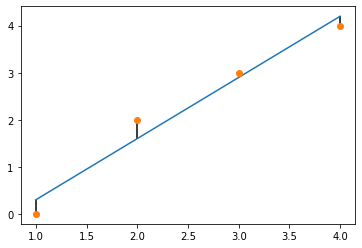

In [148]:
plt.plot(np.array(X)[:,-1],pred)
plt.plot(np.array(X)[:,-1],y,"o")
plt.vlines(np.array(X)[:,-1], y, pred, colors='k', linestyles='solid', label='')

In [159]:
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k

class linreg():
    def __init__(self,X,y):
        self.X = X
        self.X = np.concatenate([[[1]for x in range(len(X))],X],axis=1)
        self.y = y
        self.XT = np.transpose(self.X)
        self.XXT = multiply(self.XT,self.X)
        #self.iX = inverse(self.XXT)
        self.iX = np.linalg.pinv(self.XXT)
        self.w = multiply(multiply(self.iX,self.XT),self.y)
        self.pred = calc(self.X,self.w)
        
        self.plot()
        
    def plot(self):
        plt.plot(np.array(X)[:,-1],pred)
        plt.plot(np.array(X)[:,-1],y,"o")
        plt.vlines(np.array(X)[:,-1], y, pred, colors='k', linestyles='solid', label='')
        plt.show()
    
X = [[1],[2],[3],[4]]
y = [[0],[2],[3],[4]]
linregLine = linreg(X,y)
linregLine.w

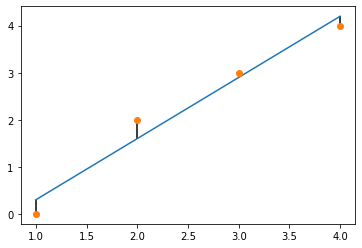

[[-0.9999999999999936], [1.2999999999999985]]

In [161]:
X = [[1],[2],[3],[4]]
y = [[0],[2],[3],[4]]
linregLine = linreg(X,y)
linregLine.w